In [1]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix, roc_auc_score, balanced_accuracy_score, mean_squared_error, r2_score
import itertools
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(123)
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
# Import label encoder
from sklearn import preprocessing

D:\Program Files\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Program Files\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\Program Files\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# Train/Test Split
X = pd.read_csv("X_re.csv")
y = pd.read_csv("y_re.csv")

In [4]:
from sklearn.model_selection import train_test_split

# split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Standardization
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X_train.columns))
X_test = pd.DataFrame(scaler.transform(X_test), columns=list(X_test.columns))

In [6]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y_train_nn = label_encoder.fit_transform(y_train)
y_test_nn = label_encoder.fit_transform(y_test)

x_train_ann = X_train
x_test_ann = X_test

In [7]:
num_classes = 3
y_train_ann = utils.to_categorical(y_train_nn, num_classes)
y_test_ann = utils.to_categorical(y_test_nn, num_classes)
num_features = x_test_ann.shape[1]
num_classes = y_train_ann.shape[1]

In [8]:
ann_model3 = tf.keras.Sequential()
ann_model3.add(Dense(512, kernel_initializer='normal', activation='sigmoid', input_shape=(27,)))
ann_model3.add(Dense(64, kernel_initializer='normal', activation='sigmoid'))
ann_model3.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
ann_model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history3 = ann_model3.fit(x_train_ann, y_train_ann, validation_data=(x_test_ann,y_test_ann), epochs=5, batch_size=200, verbose=1)

Epoch 1/5
14003/14003 [==============================] - 40s 3ms/step - loss: 0.9358 - accuracy: 0.5341 - val_loss: 0.9213 - val_accuracy: 0.5448
Epoch 2/5
14003/14003 [==============================] - 39s 3ms/step - loss: 0.9147 - accuracy: 0.5494 - val_loss: 0.9060 - val_accuracy: 0.5559
Epoch 3/5
14003/14003 [==============================] - 40s 3ms/step - loss: 0.8974 - accuracy: 0.5609 - val_loss: 0.8851 - val_accuracy: 0.5696
Epoch 4/5
14003/14003 [==============================] - 41s 3ms/step - loss: 0.8732 - accuracy: 0.5776 - val_loss: 0.8590 - val_accuracy: 0.5876
Epoch 5/5
14003/14003 [==============================] - 41s 3ms/step - loss: 0.8449 - accuracy: 0.5949 - val_loss: 0.8334 - val_accuracy: 0.6024


In [10]:
score3 = ann_model3.evaluate(x_test_ann, y_test_ann, verbose=1)
print('Test loss: ', score3[0])
print('Test Accuracy:: ', score3[1])

21880/21880 [==============================] - 40s 2ms/step - loss: 0.8334 - accuracy: 0.6024
Test loss:  0.8334228992462158
Test Accuracy::  0.6023589968681335


In [16]:
score3 = ann_model3.evaluate(x_test_ann, y_test_ann, verbose=1)
print('Test loss: ', score3[0])
print('Test Accuracy: ', score3[1])

21880/21880 [==============================] - 32s 1ms/step - loss: 0.8334 - accuracy: 0.6024
Test loss:  0.8334228992462158
Test Accuracy:  0.6023589968681335


In [12]:
ann_train = ann_model3.predict(x_train_ann)
prediction = ann_model3.predict(x_test_ann)


21880/21880 [==============================] - 28s 1ms/step


In [13]:
ann_train1 = np.argmax(ann_train, axis=1)+1
predictions1=np.argmax(prediction, axis=1)+1

In [14]:
def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    fig, ax = plt.subplots(figsize=(12, 6))
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    #class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.colorbar()
    plt.show()

              precision    recall  f1-score   support

           1       0.64      0.74      0.69    933540
           2       0.54      0.43      0.48    933566
           3       0.62      0.64      0.63    933430

    accuracy                           0.60   2800536
   macro avg       0.60      0.60      0.60   2800536
weighted avg       0.60      0.60      0.60   2800536

              precision    recall  f1-score   support

           1       0.64      0.74      0.68    233350
           2       0.53      0.43      0.48    233324
           3       0.62      0.64      0.63    233460

    accuracy                           0.60    700134
   macro avg       0.60      0.60      0.60    700134
weighted avg       0.60      0.60      0.60    700134



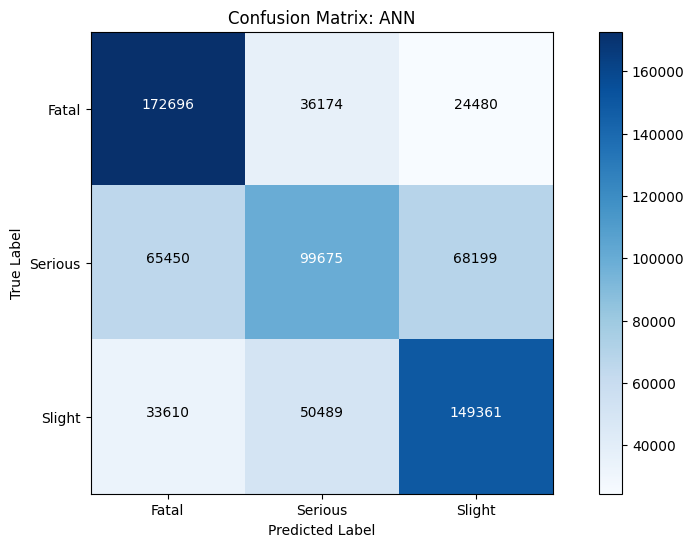

In [15]:
print(classification_report(y_train, ann_train1))
print(classification_report(y_test, predictions1))
plot_cf(y_test, predictions1, model_name='ANN', class_names=['Fatal', 'Serious','Slight'])